## AD325 Project 2
#### Recommendation System
11/06/2024
Alan M H Beem

Initial results were inconsistent, much of which was to do with priority-ties in heap, assembled in a different order depending on hash function.

In [1]:
print(hash("string_test"))  # this varies with each restart of the kernel
print(hash("string_test"))  # but is consistent for each code instance

-2589340076687163150
-2589340076687163150


### Recommendations:

In [2]:
from main_script import main, demonstration
main()



Recommendations using 'sum' update technique, and biasing as a function of game popularity, and game similarity:
Using collision avoidance technique: sepa
Recommendations for user1: ['Battlefield', 'Bloodborne', 'Gears of War']
Recommendations for user2: ['Bayonetta', 'Splatoon', 'Bloodborne']
Recommendations for user3: ['League of Legends', 'Resident Evil', 'Bayonetta']
Recommendations for user4: ['Silent Hill', 'Half-Life', 'Splatoon']
Recommendations for user5: ['Bayonetta', 'Resident Evil', 'Half-Life']
Recommendations for user6: ['Red Dead Redemption 2', 'Dragon Age', 'Metal Gear Solid']
Recommendations for user7: ['Bioshock', 'Super Mario Bros', 'Animal Crossing']
Insertion Time: 0.00064849853515625
Retrieval Time: 0.00064849853515625
UserHashTable collisions since last rehash: 24
Total collisions since last rehashes: 126 (this includes all HashTables used in comparisons of users' games lists)
Probe time: 0.00018215179443359375


Dangit, now it's inconsistent again.

### Experiment with open addressing

In [3]:
from experimental_hash_table import ExperimentalHashTable

In [4]:
import random


N = 1000

hash_table = ExperimentalHashTable(97, 'sep')
print(f"\n\nHashTable initial size: {len(hash_table.hash_table)}, data size: N={N}")
iterations = 100
probing_functions_list = ['separate chaining', 'linear', 'quadratic', 'double', 'prime', '3/2', "to Euler's number", 'exponential',  "^e 2", 'cubic', 'quartic', 'quintic', 'sextic', 'septic', 'octic', 'nonic', 'decic', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'rand']
collisions_data = [0 for each in probing_functions_list]
probe_distances = [set() for each in probing_functions_list]

index_keys = [n for n in range(N + 1)]
total_inserts = 0

for _ in range(iterations):
    index_keys_copy = index_keys.copy()
    random.shuffle(index_keys_copy)
    for probing_function, each_set in zip(probing_functions_list, probe_distances):
        hash_table = ExperimentalHashTable(97, probing_function)
        hash_table.insert(index_keys_copy[0], '')
        hash_table.retrieve(index_keys_copy[0])
        for key in index_keys_copy[0:len(index_keys_copy) // 2 + 1]:
            hash_table.insert(key, '')
        for key in index_keys_copy[len(index_keys_copy) // 2:]:
            hash_table.insert(key, '')
        collisions_data[probing_functions_list.index(probing_function)] += hash_table.collision_count
        for each in hash_table.probe_distances:
            each_set.add(tuple(each))
print(f"\n\nHashTable size after operation: {len(hash_table.hash_table)}, data size: N={N}")
print("Average number of collisions for N={N} shuffled order, this inserts and retrieves a key, then inserts half the keys, then inserts the last key of the first half, and the rest of the keys (expect a collision for each), 100 iterations") 
for each_func, each_datum in zip(probing_functions_list, collisions_data):
    print(f"{each_func}: {each_datum / iterations} {'the second hash is computed by the first hash ^ Euler\'s number + (1 if even, else 0)' if each_func == '^e 2' else ''}")



HashTable initial size: 97, data size: N=1000


HashTable size after operation: 3203, data size: N=1000
Average number of collisions for N={N} shuffled order, this inserts and retrieves a key, then inserts half the keys, then inserts the last key of the first half, and the rest of the keys (expect a collision for each), 100 iterations
separate chaining: 1.0 
linear: 535.86 
quadratic: 32.61 
double: 2.82 
prime: 111.3 
3/2: 84.17 
to Euler's number: 16.43 
exponential: 11.43 
^e 2: 16.91 the second hash is computed by the first hash ^ Euler's number + (1 if even, else 0)
cubic: 13.59 
quartic: 8.11 
quintic: 6.08 
sextic: 5.22 
septic: 4.41 
octic: 6.76 
nonic: 4.0 
decic: 3.76 
11: 2.85 
12: 3.6 
13: 2.73 
14: 4.65 
15: 3.48 
16: 3.0 
17: 3.56 
18: 3.42 
19: 2.6 
20: 3.33 
rand: 1.38 


#### Ordering of games for consistent results

The games could be naturally ordered by any metric. In an effort to decrease the number of tied priorities, the heaped priorities have a slight bias toward more-purchased games, and game-similarity (effected by rec_sys.py). Additionally, the heap returns alphabetically earlier titles when titles have approximately equal priority (effected by user_max_heap.py).

### Differences between collision avoidance techniques, collisions

Separate chaining can have at most a number of collisions per insert equal to the longest chain, and keeping the table to a load factor of up to 1 keeps these relatively short. Separate chaining has the advantage of collisions not 'spilling over' into the rest of the table. The best open addressing collision avoidance technique is double, as it produces a uniform second hash function (?). Generally, over the other techniques, it seems that the larger power of the exponent applied to the hash the better the function is at avoiding collisions, to a point, and likely this threshold depends on the size of the hash table relative to the expected values of the probe function (in the experiment above, this seems to occur between quartic and quintic probing). Second to double hashing is randomly hashing steps; some sequences of random steps are worse than others, in terms of collisions, but they're mostly pretty good. Prime probing (each step is the kth prime, starting from 1) is between 3/2 and to Euler's number (~2.718).
### MaxHeap

The max heap can't be guaranteed to provide unique games unless a scheme is implemented to update values (which is handled in a linear time subroutine in UserMaxHeap). The entries are updated by keeping the maximum priority, or forming a sum of priorities. I think the sum technique makes more sense: 
##### MaxHeap Maximum or Sum: Sum
Looking at the recommendations by the 'keep maximum' update technique, if the number of games of a user_j that are disjoint from the games of a user_i is equal to or greater than the value of top_n, and that user (user_j) is the most similar to user_i, then all the recommendations will be from the information of only one user (user_j). Additionally, we cannot distinguish the priorities of the games resulting from such a selection from the heap.

The recommendations by the sum update technique incorporate information from all users.

A hypothesis to support only treating some pairs of users as similar is either contradictory to the computation as performed, or forms an equivalence relation that could cluster computations. If this forms an equivalence relation, then the data ought to be processed such that clusters of users are formed (eq. rel.; a hash) before executing computations with complexity proportional to Cartesian products. We might still want to find the summed Jaccard similarity between all users within each cluster.

Without such a hypothesis, I think that it makes more sense to make recommendations as a function of the sum of Jaccard similarity for disjoint games over all users in the dataset.

Such hypotheses may be of ample supply, and here is where one could fit in additional logic or descriptions of user similarity. Though there are likely ample practical hypotheses from fields such as related to marketing, an implementation such as in this project could be used with such hypothetical clusters, and where some data such as outcomes could determine whether a purchased game was liked (or, ought to have been recommended), arbitrary hypotheses (eq. rel., hash functions) could be distinguished on the basis of correct predictions. Regarding real-world data, such hypothetical comparisons would be biased due to sampling only the actually purchased games (another point of entry for ML/description of user behavior).

### Appendix:

In [5]:
hash_table = ExperimentalHashTable(97, 'sep')
print(f"\n\nHashTable initial size: {len(hash_table.hash_table)}, data size: N=1000")
iterations = 100
probing_functions_list = ['separate chaining', 'linear', 'quadratic', 'double', 'prime', '3/2', "to Euler's number", 'exponential',  "^e 2", 'cubic', 'quartic', 'quintic', 'sextic', 'septic', 'octic', 'nonic', 'decic', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'rand']
collisions_data = [0 for each in probing_functions_list]

N = 1000
index_keys = [n for n in range(N + 1)]
for _ in range(iterations):
    index_keys_copy = index_keys.copy()
    random.shuffle(index_keys_copy)
    for probing_function in probing_functions_list:
        hash_table = ExperimentalHashTable(97, probing_function)
        # hash_table.rehash_increment = lambda p: 100
        hash_table.insert(index_keys_copy[-1], '')
        hash_table.retrieve(index_keys_copy[-1])
        for key in index_keys_copy:
            hash_table.insert(key, '')
        hash_table.insert(index_keys_copy[-2], '')
        retrieval = hash_table.retrieve(index_keys_copy[-2])
        hash_table.insert(retrieval[0], retrieval[1])
        collisions_data[probing_functions_list.index(probing_function)] += hash_table.collision_count
print(f"\n\nHashTable size after operation: {len(hash_table.hash_table)}, data size: N={N}")
print("Average number of collisions for N=1000 shuffled order, this inserts then retrieves the last key, inserts a duplicate of the second to last key, and retrieves and inserts it again, 100 iteration")
for each_func, each_datum in zip(probing_functions_list, collisions_data):
    print(f"{each_func}: {each_datum / iterations} {'the second hash is computed by the first hash ^ Euler\'s number + (1 if even, else 0)' if each_func == '^e 2' else ''}")



HashTable initial size: 97, data size: N=1000


HashTable size after operation: 3203, data size: N=1000
Average number of collisions for N=1000 shuffled order, this inserts then retrieves the last key, inserts a duplicate of the second to last key, and retrieves and inserts it again, 100 iteration
separate chaining: 2.0 
linear: 958.32 
quadratic: 43.44 
double: 9.9 
prime: 176.6 
3/2: 119.14 
to Euler's number: 20.34 
exponential: 14.35 
^e 2: 20.32 the second hash is computed by the first hash ^ Euler's number + (1 if even, else 0)
cubic: 16.78 
quartic: 10.88 
quintic: 9.13 
sextic: 7.54 
septic: 7.37 
octic: 8.75 
nonic: 6.83 
decic: 5.0 
11: 5.01 
12: 6.79 
13: 5.44 
14: 6.63 
15: 6.85 
16: 5.0 
17: 6.58 
18: 6.1 
19: 5.0 
20: 5.0 
rand: 4.49 


In [6]:
# regarding Experiment 3.1.2
for probe_function, each_set in zip(probing_functions_list, probe_distances):
    print(f"maximum probe distance for {probe_function}: {max([element[1] for element in each_set])}")

maximum probe distance for separate chaining: 1
maximum probe distance for linear: 0
maximum probe distance for quadratic: 0
maximum probe distance for double: 0
maximum probe distance for prime: 0
maximum probe distance for 3/2: 0
maximum probe distance for to Euler's number: 0
maximum probe distance for exponential: 0
maximum probe distance for ^e 2: 0
maximum probe distance for cubic: 0
maximum probe distance for quartic: 0
maximum probe distance for quintic: 0
maximum probe distance for sextic: 0
maximum probe distance for septic: 0
maximum probe distance for octic: 0
maximum probe distance for nonic: 0
maximum probe distance for decic: 0
maximum probe distance for 11: 0
maximum probe distance for 12: 0
maximum probe distance for 13: 0
maximum probe distance for 14: 0
maximum probe distance for 15: 0
maximum probe distance for 16: 0
maximum probe distance for 17: 0
maximum probe distance for 18: 0
maximum probe distance for 19: 0
maximum probe distance for 20: 0
maximum probe dista

In [7]:
# control 2
control_ht = ExperimentalHashTable(2, 'linear')
control_ht.insert(1, '')
control_ht.insert(1, '')
print(control_ht.collision_count)

1


### Code using builtins:

Game similarity matrix:


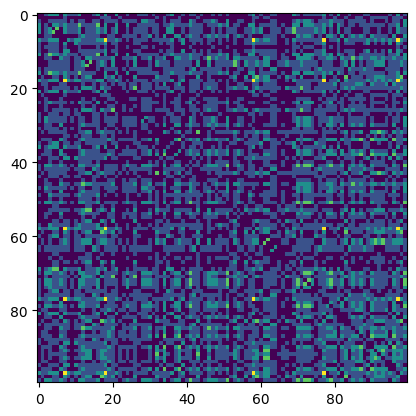

Jaccard similarity matrix


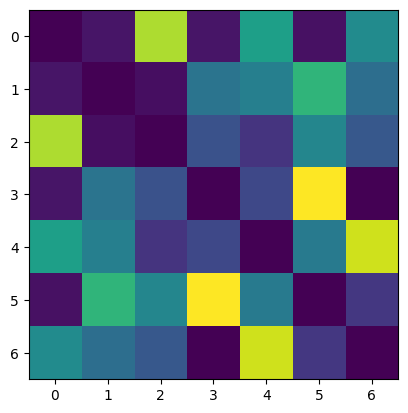

by sum: user6: [(Red Dead Redemption 2, 0.4047621047619048), (Dragon Age, 0.38624368624338623), (Metal Gear Solid, 0.3862435862433862), (World of Warcraft, 0.3862435862433862), (The Legend of Zelda, 0.36481531481481483)]
by sum: user4: [(Silent Hill, 0.44886393636363636), (Half-Life, 0.44386393636363636), (Splatoon, 0.4325003), (Dota 2, 0.3125002), (The Last of Us, 0.30636403636363635)]
by sum: user1: [(The Last of Us, 0.4095242095238095), (Battlefield, 0.4095241095238095), (Splatoon, 0.3380955380952381), (Bloodborne, 0.3380954380952381), (Gears of War, 0.3380954380952381)]
by sum: user5: [(Bayonetta, 0.5369052619047618), (Resident Evil, 0.4786235884057971), (Half-Life, 0.39066052544283414), (Portal, 0.3619050619047619), (Fire Emblem, 0.3619049619047619)]
by sum: user2: [(Bayonetta, 0.50489415706757), (Splatoon, 0.46739160434782606), (Bloodborne, 0.41666686666666664), (Gears of War, 0.41666686666666664), (Cyberpunk 2077, 0.38636383636363636)]
by sum: user7: [(Bioshock, 0.58460174927536

In [8]:
import csv
import matplotlib.pyplot as plt
import math


game_cumulative_list = []
user_data_sets = {}  # dict()
with open('user_item_data.csv', 'r') as open_file:
    csv_reader = csv.reader(open_file)
    next(csv_reader)
    for row in csv_reader:
        user = row[0]
        game = row[1]
        game_cumulative_list.append(game)
        if user not in user_data_sets:
            user_data_sets[user] = set()
        user_data_sets[user].add(game)
open_file.close()
# game similarity matrix
game_list = list(set(game_cumulative_list))
game_similarity_matrix = [[0 for g in game_cumulative_list] for l in game_cumulative_list]
game_pairs = set()
for i, game_i in zip(range(len(game_cumulative_list)), game_cumulative_list):
    for j, game_j in zip(range(len(game_cumulative_list)), game_cumulative_list):
        if i != j:
            game_pairs.add((game_i, game_j))
            for each_user in user_data_sets:
                game_set = user_data_sets[each_user]
                game_similarity_matrix[i][j] += 1 if (game_i in game_set and game_j in game_set) else 0
for k in range(len(game_similarity_matrix)):
    for L in range(len(game_similarity_matrix)):
        game_similarity_matrix[k][L] /= len(game_pairs)
# for i in range(len(game_similarity_matrix)):
#     print(game_similarity_matrix[i])
#
print("Game similarity matrix:")
plt.imshow(game_similarity_matrix)
plt.show()

class GamePriority:
    def __init__(self, game: str, priority: float):
        self.game = game
        self.priority = priority
    
    def __repr__(self):
        return f"({self.game}, {self.priority})"


class GamePrioritySum(GamePriority):
    def equals(self, other) -> bool:
        if isinstance(other, self.__class__):
            if self.game == other.game:
                self.priority += other.priority
                return True
        return False


class GamePriorityMaximum(GamePriority):  # See K-maps - Make K-map efficiency analyzer that compares all possible alignable (could be equivalent lines) parts, but also numerically, if applicable)
    def equals(self, other) -> bool:
        if isinstance(other, self.__class__):
            if self.game == other.game:
                self.priority = max(self.priority, other.priority)
                return True
        return False


class GameList(list):
    def append(self, object):
        for each in self:
            if each.equals(object):
                break
        else:
            return super().append(object)
        return None

    def __str__(self) -> str:
        return f"{[str(each) for each in self]}"

jaccard_matrix = [[0 for i in range(len(user_data_sets))] for j in range(len(user_data_sets))]  # 0.3 was for visualization as heat map

user_recs_list_sum = []
user_recs_list_max = []

minimum_similarity = 1

for i, user_i in zip(range(len(jaccard_matrix)), user_data_sets.keys()):
    user_recs_list_sum.append(GameList())
    user_recs_list_max.append(GameList())
    for j, user_j in zip(range(len(jaccard_matrix[i])), user_data_sets.keys()):
        if i != j:
            # jaccard_matrix[i][j] = -math.log2(len(user_data_sets[user_i].intersection(user_data_sets[user_j])) / len(user_data_sets[user_i].union(user_data_sets[user_j])))
            jaccard_matrix[i][j] = len(user_data_sets[user_i].intersection(user_data_sets[user_j])) / len(user_data_sets[user_i].union(user_data_sets[user_j]))
            for game in (user_data_sets[user_j] - user_data_sets[user_i]):
                user_recs_list_sum[-1].append(GamePrioritySum(game, jaccard_matrix[i][j]))
                # user_recs_list_max[-1].append(GamePriorityMaximum(game, jaccard_matrix[i][j]))
                if jaccard_matrix[i][j] < minimum_similarity:
                    minimum_similarity = jaccard_matrix[i][j]

for i in range(len(jaccard_matrix)):
    jaccard_matrix[i][i] = minimum_similarity  # 1  # the users are largely not too similar, but some pairs are relatively more similar than others

print("Jaccard similarity matrix")
plt.imshow(jaccard_matrix)
plt.show()

for game_list in user_recs_list_sum:
    for game_priority in game_list:
        game = game_priority.game
        game_bias = (game_cumulative_list.count(game) / len(game_cumulative_list)) * 0.00001
        game_similarity = 0
        similarity_row = game_similarity_matrix[game_cumulative_list.index(game)]
        for each_game, each_similarity in zip(game_list, similarity_row):
            game_similarity += each_similarity if each_game in user_data_sets[user_i] else 0
        game_similarity *= minimum_similarity
        game_similarity /= 100
        game_list.append(GamePrioritySum(game, game_similarity + game_bias))  # sums priority of game
        # user_recs_list_max[-1].append(GamePriorityMaximum(game, jaccard_matrix[i][j] + game_bias))

for rec_i in range(len(user_recs_list_sum)):
    user_recs_list_sum[rec_i].sort(key=lambda p: -p.priority)
# for rec_j in range(len(user_recs_list_max)):
#     user_recs_list_max[rec_j].sort(key=lambda p: -p.priority)

for each_rec_list_sum, each_rec_list_max, user in zip(user_recs_list_sum, user_recs_list_max, user_data_sets.keys()):
    print(f"by sum: {user}: {each_rec_list_sum[0:5]}")
    # print(f"by max: {user}: {each_rec_list_max[0:5]}")
